# Consistency of a Multistep method

#### John S Butler john.s.butler@tudublin.ie   [Course Notes](https://johnsbutler.netlify.com/files/Teaching/Numerical_Analysis_for_Differential_Equations.pdf)    [Github](https://github.com/john-s-butler-dit/Numerical-Analysis-Python)

## Overview
A one-step or multistep method is used to approximate the solution of an initial value problem of the form
$$ \frac{dy}{dt}=f(t,y), $$
with the initial condition
$$ y(a)=\alpha.$$
The method should only be used if it satisfies the three criteria:
1. that difference equation is __consistent__ with the differential equation;
2. that the numerical solution is __convergent__ to the exact answer of the differential equation;
3. that the numerical solution is __stable__.

In this notebook we will illustate examples of consistent and inconsistent, convergent and non-convergent, and stable and unstable methods. 

## Introduction to Consistency
### Definition
A one-step method with local truncation error $\tau_{i}(h)$ at the $i$th step is said
to be __consistent__ with the differential equation it approximates if 
$$\lim_{h \rightarrow 0} (\max_{1 \leq i \leq N}|\tau_{i}(h)|)=0 $$
where
$$\tau_{i}(h)=\frac{y_{i+1}-y_{i}}{h}-F(t_i,y_i,h,f) $$
As $h \rightarrow 0$ does $F(t_i,y_i,h,f) \rightarrow f(t,y)$. 

All the Runge Kutta, and Adams methods are consistent in this course. This notebook will illustrate a non-consistent method which with great hubris I will call the Abysmal-Butler methods.
## 2-step Abysmal Butler Method 
In this notebook we will illustate an __inconsistent__ method using the 2-step Abysmal Butler method given by the difference equation
$$w_{i+1} = w_{i} + \frac{h}{2}(4f(t_i,w_i)-3f(t_{i-1},w_{i-1})). $$

## Intial Value Problem
To illustrate consistency we will apply the method to a linear intial value problem given by
$$ y^{'}=t-y, \ \ (0 \leq t \leq 2), $$
with the initial condition
$$y(0)=1,$$
with the exact solution
$$y(t)= 2e^{-t}+t-1.$$

## Python Libraries

In [1]:
import numpy as np
import math 
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
warnings.filterwarnings("ignore")

### Defining the function
$$ f(t,y)=t-y.$$

In [2]:
def myfun_ty(t,y):
    return t-y

## Discrete Interval
Defining the step size  $h$  from the interval range  $a≤t≤b$  and number of steps  $N$ 
$$h=\frac{b−a}{N}.$$
 
This gives the discrete time steps,
$$t_i=t_0+ih,$$
where  $t_0=a.$

Here the interval is  $0≤t≤2$  and number of step  4 
$$h=\frac{2−0}{40}=0.05.$$
 
This gives the discrete time steps,
$$t_i=0+i0.5,$$
for  $i=0,1,⋯,40.$

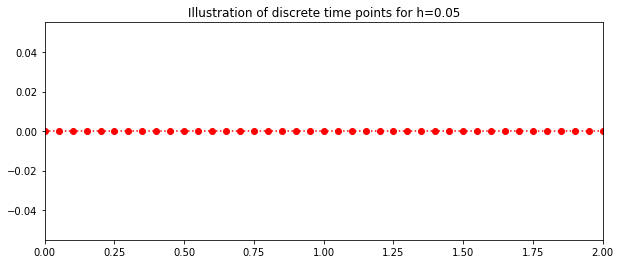

In [3]:
# Start and end of interval
b=2
a=0
# Step size
N=40
h=(b-a)/(N)
t=np.arange(a,b+h,h)
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red')
plt.xlim((0,2))
plt.title('Illustration of discrete time points for h=%s'%(h))
plt.show()

## Exact Solution
THe initial value problem has the exact solution
$$y(t)=2e^{-t}+t-1.$$
The figure below plots the exact solution.

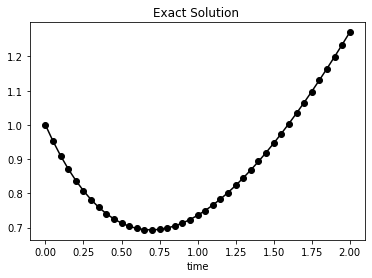

In [4]:
IC=1 # Intial condtion
y=(IC+1)*np.exp(-t)+t-1
fig = plt.figure(figsize=(6,4))
plt.plot(t,y,'o-',color='black')
plt.title('Exact Solution ')
plt.xlabel('time')
plt.show()

In [5]:
# Initial Condition
w=np.zeros(N+1)
#np.zeros(N+1)
w[0]=IC



## 2-step Abysmal Butler Method 

The 2-step Abysmal Butler difference equation is
$$w_{i+1} = w_{i} + \frac{h}{2}(4f(t_i,w_i)-3f(t_{i-1},w_{i-1})) $$

For $i=0$ the system of difference equation is:
$$w_{1} = w_{0} + \frac{h}{2}(4(t_0-w_0)-3(t_{-1}-w_{-1})) $$
this is not solvable as <font color='red'> $w_{-1}$ </font> is unknown.

For $i=1$ the difference equation is:
$$w_{2} = w_{1} + \frac{h}{2}(4(t_1-w_1)-3(t_{0}-w_{0})) $$
this is not solvable as <font color='red'> $w_{1}$  </font> is unknown. $w_1$ can be  approximated using a one step method. Here, as the exact solution is known,
$$w_1=2e^{-t_1}+t_1-1.$$


In [6]:
### Initial conditions
w=np.zeros(len(t))
w0=np.zeros(len(t))
w[0]=IC
w[1]=y[1]

### Loop

In [7]:
for k in range (1,N):
    w[k+1]=(w[k]+h/2.0*(4*myfun_ty(t[k],w[k])-3*myfun_ty(t[k-1],w[k-1])))   


### Plotting solution

In [8]:
def plotting(t,w,y):
    fig = plt.figure(figsize=(10,4))
    plt.plot(t,y, 'o-',color='black',label='Exact')
    plt.plot(t,w,'^:',color='red',label='Abysmal-Butler')
    plt.xlabel('time')
    plt.legend()
    plt.show 

The plot below shows the exact solution (black) and the Abysmal-Butler approximation (red) of the intial value problem.

The Numerical approximation does not do a good job of approximating the exact solution and that is because it is inconsistent.

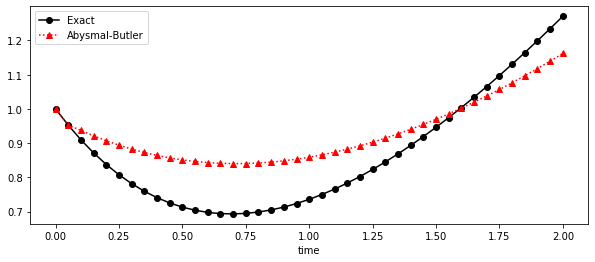

In [9]:
plotting(t,w,y)

## Consistency 
To prove that the Abysmal-Butler method does not satisfy the consistency condition,
$$\tau_{i}(h)=\frac{y_{i+1}-y_{i}}{h}-\frac{1}{2}[4(f(t_i,y_i)-3f(t_{i-1},y_{i-1})] $$
As $h \rightarrow 0$  $$\frac{1}{2}[4(f(t_i,y_i)-3f(t_{i-1},y_{i-1})] \rightarrow \frac{f(t_i,y_i)}{2}.$$
While as $h \rightarrow 0$  $$\frac{y_{i+1}-y_{i}}{h} \rightarrow y^{'}=f(t_i,y_i).$$
Hence as $h \rightarrow 0$ $$\frac{y_{i+1}-y_{i}}{h}-\frac{1}{2}[4(f(t_i,y_i)-3f(t_{i-1},y_{i-1})]\rightarrow f(t_i,y_i)-\frac{f(t_i,y_i)}{2}=\frac{f(t_i,y_i)}{2},$$
which violates the consistency condition (inconsistent).


In [10]:
d = {'time': t[0:5], 'Abysmal Butler': w[0:5],'Exact':y[0:5],'Error':np.abs(y[0:5]-w[0:5])}
df = pd.DataFrame(data=d)
df

,time,Abysmal Butler,Exact,Error
0,0.00,1.000000,1.000000,0.000000
1,0.05,0.952459,0.952459,0.000000
2,0.10,0.937213,0.909675,0.027538
3,0.15,0.921176,0.871416,0.049760
4,0.20,0.906849,0.837462,0.069388


# Convergence of a Multistep Method

## Introduction to Convergence
In this notebook we will illustate an non-convergent method.

### Definition
A one step method difference equation is said to be __convergent__ with respect to
the differential equation and $w_i$, the approximation obtained from the difference
method at the ith step.
$$ \max_{h \rightarrow 0}\max_{1 \leq i \leq N}|y(t_i)-w_i|=0$$
All the Runge Kutta, Adams-Bashforth and Adams-Moulton methods are convergent.

## 2-step Abysmal Butler Multistep Method 
This notebook will illustrate a non-convergent multistep method using the Abysmal-Butler method, named with great pride after the author.
The 2-step Abysmal Butler difference equation is given by
$$w_{i+1} = w_{i} + \frac{h}{2}(4f(t_i,w_i)-3f(t_{i-1},w_{i-1})), $$
The final section of this notebooks shows that the method is non-convergent for all differential equations.

## Intial Value Problem
To illustrate converegnce we will apply Abysmal-Butler multistep method to the linear intial value problem
$$ y^{'}=t-y, \ \ (0 \leq t \leq 2) $$
with the initial condition
$$y(0)=1,$$
with the exact solution
$$y(t)= 2e^{-t}+t-1.$$

### Defining the function
$$ f(t,y)=t-y.$$

In [11]:
def myfun_ty(t,y):
    return t-y

## Discrete Interval
To illustrtate that the method is internally convergent but not convergent with the exact solution we define two discrete meshes, one coarse and one fine.
### Coarse mesh
Defining the step size  $h$  from the interval range  $a≤t≤b$  and number of steps  $N$ 
$$h=\frac{b−a}{N}.$$
 
This gives the discrete time steps,
$$t_i=t_0+ih,$$
where  $t_0=a,$ for $i=0,1...,N$.
### Fine mesh
Defining the step size  $h/2$  from the interval range  $a≤t≤b$  and number of steps  $2N$ 
$$h=\frac{b−a}{2N}.$$
 
This gives the discrete time steps,
$$t_i=t_0+ih,$$
where  $t_0=a,$ for $i =0,1,...2N$.

The plot below shows the coarse (red) and fine (green) discrete time intervals over the domain.

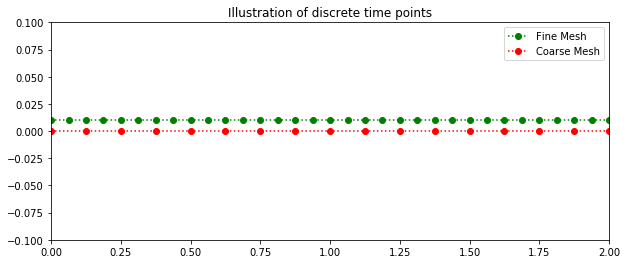

In [12]:
# Start and end of interval
b=2
a=0
# Step size
N=16
h=(b-a)/(N)
t=np.arange(a,b+h,h)
N2=N*2
h2=(b-a)/(N2)
t2=np.arange(a,b+h2,h2)
w2=np.zeros(len(t2))

fig = plt.figure(figsize=(10,4))
plt.plot(t2,0.01*np.ones(len(t2)),'o:',color='green',label='Fine Mesh')
plt.plot(t,0*t,'o:',color='red',label='Coarse Mesh')
plt.xlim((0,2))
plt.ylim((-0.1,.1))

plt.legend()
plt.title('Illustration of discrete time points')
plt.show()

## 2-step Abysmal Butler Method 
The 2-step Abysmal Butler difference equation is
$$w_{i+1} = w_{i} + \frac{h}{2}(4(t_i-w_i)-3(t_{i-1}-w_{i-1})), $$
for $i=1,...N.$
For $i=0$ the system of difference equation is:
$$w_{1} = w_{0} + \frac{h}{2}(4(t_0-w_0)-3(t_{-1}-w_{-1})) $$
this is not solvable as <font color='red'> $w_{-1}$ </font> is unknown.

For $i=1$ the difference equation is:
$$w_{2} = w_{1} + \frac{h}{2}(4(t_1-w_1)-3(t_{0}-w_{0})) $$
this is not solvable a <font color='red'> $w_{1}$  </font> is unknown. $w_1$ can be  approximated using a one step method. Here, as the exact solution is known,
$$w_1=2e^{-t_1}+t_1-1.$$


In [13]:
### Initial conditions
IC=1
w=np.zeros(len(t))
w[0]=IC

w2=np.zeros(len(t2))
w2[0]=IC
w2[1]=(IC+1)*np.exp(-t2[1])+t2[1]-1



### Loop


In [14]:

# Fine Mesh
for k in range (1,N2):
    w2[k+1]=(w2[k]+h2/2.0*(4*myfun_ty(t2[k],w2[k])-3*myfun_ty(t2[k-1],w2[k-1]))) 
    
    
w[1]=w2[2]

# Coarse Mesh
for k in range (1,N):
    w[k+1]=(w[k]+h/2.0*(4*myfun_ty(t[k],w[k])-3*myfun_ty(t[k-1],w[k-1])))   


### Plotting solution

In [15]:
def plotting_fine(t,w,t2,w2):
    y=(2)*np.exp(-t2)+t2-1
    fig = plt.figure(figsize=(10,4))
    plt.plot(t,w,'^:',color='red',label='Coarse Mesh (N)')
    plt.plot(t2,w2, 'v-',color='green',label='Fine Mesh (2N)')


    plt.plot(t2,y, 'o-',color='black',label='Exact?')
    plt.xlabel('time')
    plt.legend()
    plt.title('Abysmal Butler')
    plt.show 

The plot below shows the Abysmal-Butler approximation for a low N (red) and $N\times2$ (green) and the exact solution (black) of the intial value problem

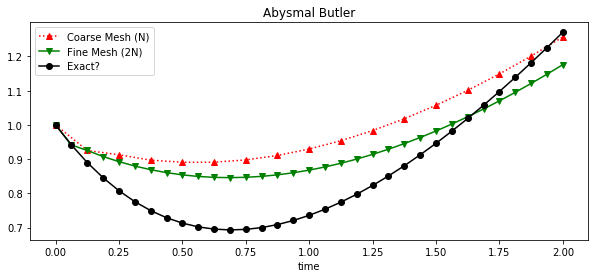

In [16]:
plotting_fine(t,w,t2,w2)

## Convergent 
The Abysmal-Butler method does satisfy the Lipschitz condition:
$$F(t,w:h)-F(t,\hat{w}:h)=\frac{4}{2}f(t,w_i)-\frac{3}{2}f(t-h,w_{i-1}))-(\frac{4}{2}f(t,\hat{w}_{i})-\frac{3}{2}f(t-h,\hat{w}_{i-1})))$$
$$F(t,w:h)-F(t,\hat{w}:h)=\frac{4}{2}(f(t,w_i)-f(t,\hat{w}_i))-\frac{3}{2}(f(t-h,w_{i-1}))-f(t-h,\hat{w}_{i-1})))$$
$$F(t,w:h)-F(t,\hat{w}:h)\leq\frac{4}{2}L|w_i-\hat{w_i}|+\frac{3}{2}L|w-\hat{w}|\leq \frac{7}{2} L|w_i-\hat{w_i}|$$
This means it is internally convergent,
$$|w_i-\hat{w_i}|\rightarrow 0$$ 
as $h \rightarrow 0$,
but as it is not consistent it will never converge to the exact solution
$$ |y_i-w_i| \not= 0.$$


In [17]:
d = {'time': t[0:5], 'Abysmal Butler': w[0:5],'Abysmal Butler w2 N*2': w2[0:10:2],
     'w-w2':np.abs(w[0:5]-w2[0:10:2])}
df = pd.DataFrame(data=d)
df

,time,Abysmal Butler,Abysmal Butler w2 N*2,w-w2
0,0.000,1.000000,1.000000,0.000000
1,0.125,0.925223,0.925223,0.000000
2,0.250,0.912667,0.892595,0.020072
3,0.375,0.897042,0.869112,0.027930
4,0.500,0.890782,0.853975,0.036807


# Stability of a Multistep method

## Definition of Stability
The stability of a numerical method is not as tangable as consistency and convergence but when you see an unstable solution it is obvious.


To determine the stabilty of a multistep method we need three definitions:


### Definition: Characteristic Equation
Associated with the difference equation 
$$ w_0=\alpha \ \ \ w_1=\alpha_1 \ \ \ ... \ \ \ w_{m-1}=\alpha_{m-1} $$
$$w_{i+1} = a_{m-1}w_{i}+a_{m-2}w_{i-1}+...+a_{0}w_{i+1-m} +hF(t_i,h,w_{i+1},...,w_{i+1-m}),$$
is the __characteristic equation__ given by
$$\lambda^{m} - a_{m-1}\lambda^{m-1}-a_{m-2}\lambda^{m-2}-...-a_{0} =0. $$

### Definition: Root Condition 

Let $\lambda_1,...,\lambda_m$ denote the roots of the that characteristic equation
$$\lambda^{m} - a_{m-1}\lambda^{m-1}-a_{m-2}\lambda^{m-2}-...-a_{0} =0 $$
associated with the multi-step difference method
$$ w_0=\alpha \ \ \ w_1=\alpha_1 \ \ \ ... \ \ \ w_{m-1}=\alpha_{m-1} $$
$$ w_{i+1} = a_{m-1}w_{i}+a_{m-2}w_{i-1}+...+a_{0}w_{i+1-m} +hF(t_i,h,w_{i+1},...,w_{i+1-m}),$$
If $|\lambda_{i}|\leq 1$ for each $i=1,...,m$ and all roots with absolute value 1
are simple roots then the difference equation is said to satisfy the __root condition__.

### Definition: Stability
1. Methods that satisfy the root condition and have $\lambda=1$ as the only root 
of the characteristic equation of magnitude one and all other roots are 0 are called __strongly stable__;
2. Methods that satisfy the root condition and have more than one distinct root
with magnitude one are called __weakly stable__;
3. Methods that do not satisfy the root condition are called __unstable__.

All one step methods, Adams-Bashforth and Adams-Moulton methods are all stongly stable.



## Intial Value Problem
To illustrate stability we will apply the method to a linear intial value problem given by
$$ y^{'}=t-y, \ \ (0 \leq t \leq 2), $$
with the initial condition
$$y(0)=1,$$
with the exact solution
$$y(t)= 2e^{-t}+t-1.$$

## Introduction to unstable
This notebook illustrates an unstable multistep method for numerically approximating an initial value problem
$$ \frac{dy}{dt}=f(t,y), $$
with the initial condition
$$ y(a)=\alpha,$$
using the Modified Abysmal Kramer-Butler method. The method is named after the great [Cosmo Kramer]( https://en.wikipedia.org/wiki/Cosmo_Kramer) and myself [John Butler](https://johnsbutler.netlify.com).

## 2-step Abysmal Kramer-Butler Method
The 2-step Abysmal Kramer-Butler difference equation is given by
$$w_{i+1} = w_{i-1} + h(4f(t_i,w_i)-2f(t_{i-1},w_{i-1})) $$
by changing $F$, the Modified Abysmal Butler Method (see convergent and consistent notebooks), the Abysmal Kramer-Butler method is consistent with the differential equation and convergent with the exact solution (see below for proof).
But the most important thing is that method is weakly stable, it fluctuates widely around the exact answer, just like it's name sake Kramer (for examples see any Seinfeld episode).

### Defining the function
$$ f(t,y)=t-y.$$

In [18]:
def myfun_ty(t,y):
    return t-y

## Discrete Interval
Defining the step size  $h$  from the interval range  $a≤t≤b$  and number of steps  $N$ 
$$h=b−ah.$$
 
This gives the discrete time steps,
$$t_i=t_0+ih,$$
where  $t_0=a.$

Text(0.5, 1.0, 'Illustration of discrete time points')

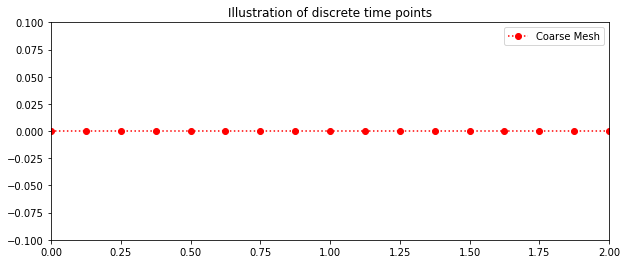

In [19]:
# Start and end of interval
b=2
a=0
# Step size
N=16
h=(b-a)/(N)
t=np.arange(a,b+h,h)
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red',label='Coarse Mesh')
plt.xlim((0,2))
plt.ylim((-0.1,.1))

plt.legend()
plt.title('Illustration of discrete time points')

## 2-step  Abysmal Kramer-Butler Method

For this initial value problem 2-step Abysmal Kramer-Butler difference equation is
$$w_{i+1} = w_{i-1} + h(4(t_i- w_i)-2(t_{i-1}-w_{i-1})) $$
by changing $F$, the Modified Abysmal Butler Method, is consistent and convergent.

For $i=0$ the system of difference equation is:
$$w_{1} = w_{-1} + h(4(t_0-w_0)-2(t_{-1}-w_{-1})) $$
this is not solvable as <font color='red'> $w_{-1}$ </font> is unknown.

For $i=1$ the difference equation is:
$$w_{2} = w_{0} + h(4(t_1-w_1)-2(t_{0}-w_{0})) $$
this is not solvable as <font color='red'> $w_{1}$  </font> is unknown. $w_1$ can be  approximated using a one step method. Here, as the exact solution is known,
$$w_1=2e^{-t_1}+t_1-1.$$


In [20]:
### Initial conditions
IC=1
w=np.zeros(len(t))
y=(2)*np.exp(-t)+t-1
w[0]=IC
w[1]=y[1]

### Loop

In [21]:
for i in range (1,N):
    w[i+1]=(w[i-1]+h*(4*myfun_ty(t[i],w[i])-2*myfun_ty(t[i-1],w[i-1])))   


### Plotting solution

In [22]:
def plotting_stable(t,w,y):
    
    fig = plt.figure(figsize=(10,4))
    plt.plot(t,w,'^:',color='red',label='Abysmal Kramer-Butler (N)')
    plt.plot(t,y, 'o-',color='black',label='Exact')
    plt.xlabel('time')
    plt.legend()
    plt.title('Abysmal Abysmal Kramer-Butler')
    plt.show 

The plot below shows the Abysmal Kramer-Butler approximation $w_i$ (red) and the exact solution $y(t_i)$ (black) of the intial value problem. 

The numerically solution initially approximates the exact solution $(t<.5)$ reasonably but then the instability creeps in such that the numerical approximation starts to widely oscilate around the exact solution.

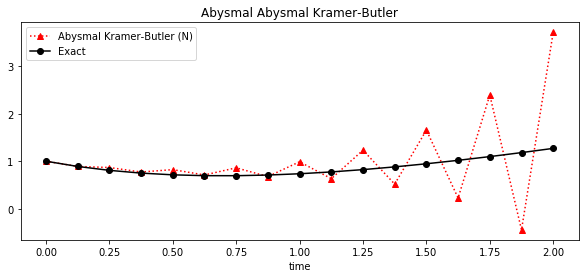

In [23]:
plotting_stable(t,w,y)

The table below illustrates the absolute error and the signed error of the numerical method.

In [24]:
n=10
d = {'time': t[0:n], 'Abysmal Kramer-Butler w': w[0:n],'Exact Error abs':np.abs(y[0:n]-w[0:n]),
     'Exact Error':(y[0:n]-w[0:n])}
df = pd.DataFrame(data=d)
df

,time,Abysmal Kramer-Butler w,Exact Error abs,Exact Error
0,0.000,1.000000,0.000000,0.000000
1,0.125,0.889994,0.000000,0.000000
2,0.250,0.867503,0.059902,-0.059902
3,0.375,0.772491,0.022912,-0.022912
4,0.500,0.823134,0.110072,-0.110072
5,0.625,0.710297,0.014774,-0.014774
6,0.750,0.861269,0.166535,-0.166535
7,0.875,0.675986,0.032738,0.032738
8,1.000,0.988592,0.252834,-0.252834
9,1.125,0.631937,0.142368,0.142368


# Theory
## Consistent 
The Abysmal Kramer-Butler method does satisfy the consistency condition
$$\tau_{i}(h)=\frac{y_{i+1}-y_{i-1}}{2h}-\frac{1}{2}[4(f(t_i,y_i)-2f(t_{i-1},y_{i-1})] $$
As $h \rightarrow 0$  $$\frac{1}{2}[4(f(t_i,y_i)-2f(t_{i-1},y_{i-1})] \rightarrow f(t_i,y_i).$$
While as $h \rightarrow 0$  $$\frac{y_{i+1}-y_{i-1}}{2h} \rightarrow \frac{y^{'}}{1}=\frac{f(t_i,y_i)}{1}.$$
Hence as $h \rightarrow 0$ $$\frac{y_{i+1}-y_{i}}{h}-\frac{1}{2}[4(f(t_i,y_i)-2f(t_{i-1},y_{i-1})]\rightarrow f(t_i,y_i)-f(t_i,y_i)=0,$$
which means it is consistent.

## Convergent 
The Abysmal Kramer-Butler method does satisfy the Lipschitz condition:
$$F(t,w:h)-F(t,\hat{w}:h)=\frac{4}{2}f(t,w_i)-\frac{2}{2}f(t-h,w_{i-1}))-(\frac{4}{2}f(t,\hat{w}_{i})-\frac{2}{2}f(t-h,\hat{w}_{i-1})))$$
$$F(t,w:h)-F(t,\hat{w}:h)=\frac{4}{2}(f(t,w_i)-f(t,\hat{w}_i))-\frac{2}{2}(f(t-h,w_{i-1}))-f(t-h,\hat{w}_{i-1})))$$
$$F(t,w:h)-F(t,\hat{w}:h)\leq\frac{4}{2}L|w_i-\hat{w_i}|+\frac{2}{2}L|w-\hat{w}|\leq \frac{6}{2} L|w_i-\hat{w_i}|$$
This means it is internally convergent,
$$|w_i-\hat{w_i}|\rightarrow 0$$ 
as $h \rightarrow 0$.
## Stability
The Abysmal Kramer-Butler method does __not__ satisfy the stability condition.
The characteristic equation of the 
$$w_{i+1} = w_{i-1} + h(4f(t_i,w_i)-2f(t_{i-1},w_{i-1})) $$
is
$$\lambda^2 = 1, $$
This has two roots $\lambda=1$ and   $\lambda=-1$, hence the method is weakly stable.